### Q-5. Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')

In [43]:
data = pd.read_csv('rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [45]:
data.shape

(693071, 57)

In [46]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [47]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [48]:
data.duplicated().sum()

0

In [49]:
data = data.dropna()

In [50]:
data = data.drop(columns=['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime','product_id','timezone',
                          'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                          'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','latitude','longitude'],axis=1)

In [51]:
data.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'temperature',
       'apparentTemperature', 'short_summary', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

## Categorical Feature

In [52]:
cat_features = [i for i in data.columns if data[i].dtypes == 'O']
print("We have {} Catergorical features: {}".format(len(cat_features),cat_features))

We have 6 Catergorical features: ['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


## Numerical features

In [53]:
num_features = [i for i in data.columns if data[i].dtypes != 'O']
print("We have {} Numerical features: {}".format(len(num_features),num_features))

We have 32 Numerical features: ['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']


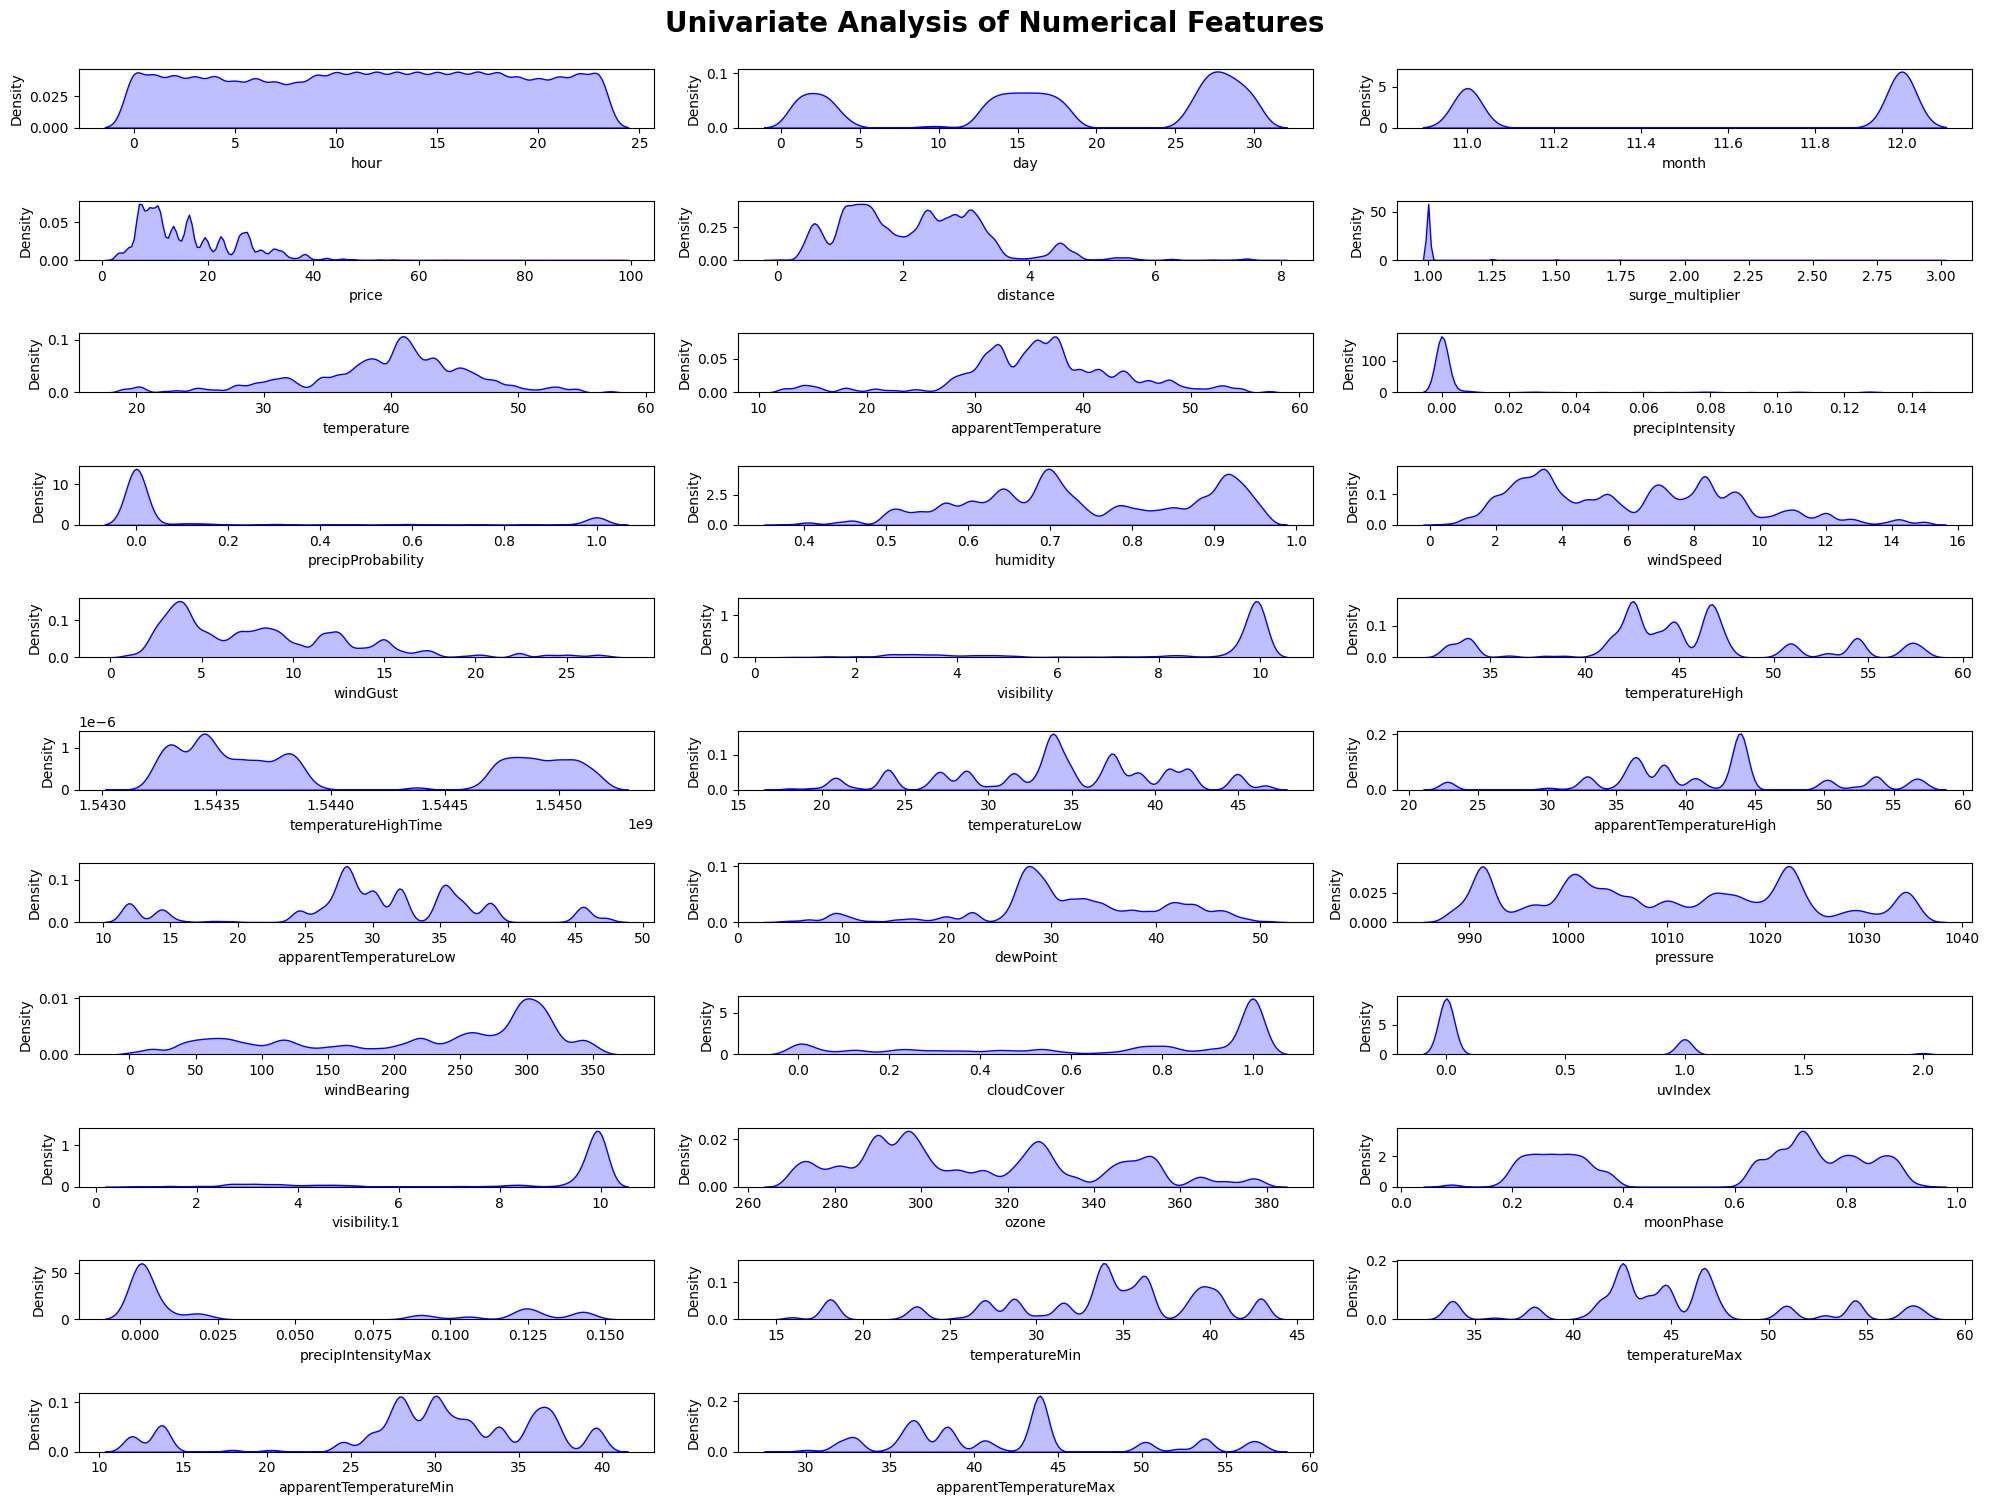

In [34]:
fig = plt.figure(figsize = (20,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',y=1.)
for i in enumerate(num_features):
    plt.subplot(11,3,i[0]+1)
    sns.kdeplot(x=data[num_features[i[0]]],shade='True',color='b')
    plt.xlabel(num_features[i[0]])
    plt.tight_layout()

In [54]:
data.corr()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
hour,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.218829,0.198212,-0.233246,-0.129631,...,0.026680,0.330326,0.173776,0.034035,0.020997,0.020288,0.015668,0.002982,0.015882,0.002904
day,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,-0.083934,-0.223410,0.091513,0.030765,...,-0.041103,-0.012083,0.105210,0.376791,-0.007038,0.145789,0.038089,-0.304704,-0.019878,-0.444366
month,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,-0.082048,0.024773,-0.154356,-0.097803,...,-0.016767,-0.012340,0.011129,-0.149111,-0.452655,-0.213301,-0.191928,0.105113,-0.191293,0.214928
price,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,-0.000084,-0.000193,0.000166,-0.000243,...,0.000883,-0.000424,0.001497,0.000460,-0.001602,0.001114,-0.000428,-0.000550,-0.000580,-0.000290
distance,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,-0.002738,-0.002835,-0.000512,0.000134,...,-0.000958,0.002422,0.004143,0.001206,-0.004301,0.000670,-0.003192,-0.003875,-0.003649,-0.003889
surge_multiplier,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,-0.001594,-0.002586,-0.001522,-0.002825,...,-0.002101,-0.002567,0.001716,0.003456,-0.000163,-0.000090,-0.000716,-0.001998,-0.001317,-0.002214
temperature,0.218829,-0.083934,-0.082048,-0.000084,-0.002738,-0.001594,1.000000,0.946157,0.182673,0.239189,...,0.355049,0.158551,-0.324158,-0.291209,0.345560,0.333160,0.789220,0.780426,0.817443,0.703078
apparentTemperature,0.198212,-0.223410,0.024773,-0.000193,-0.002835,-0.002586,0.946157,1.000000,0.098346,0.158877,...,0.294789,0.138611,-0.299337,-0.462401,0.324502,0.257128,0.697343,0.792476,0.786478,0.782255
precipIntensity,-0.233246,0.091513,-0.154356,0.000166,-0.000512,-0.001522,0.182673,0.098346,1.000000,0.838417,...,0.288915,-0.099148,-0.600613,-0.222201,0.077793,0.498344,0.236618,0.114034,0.224728,0.108917
precipProbability,-0.129631,0.030765,-0.097803,-0.000243,0.000134,-0.002825,0.239189,0.158877,0.838417,1.000000,...,0.387142,-0.071207,-0.761438,-0.235100,0.084452,0.582883,0.274351,0.142088,0.263234,0.136403


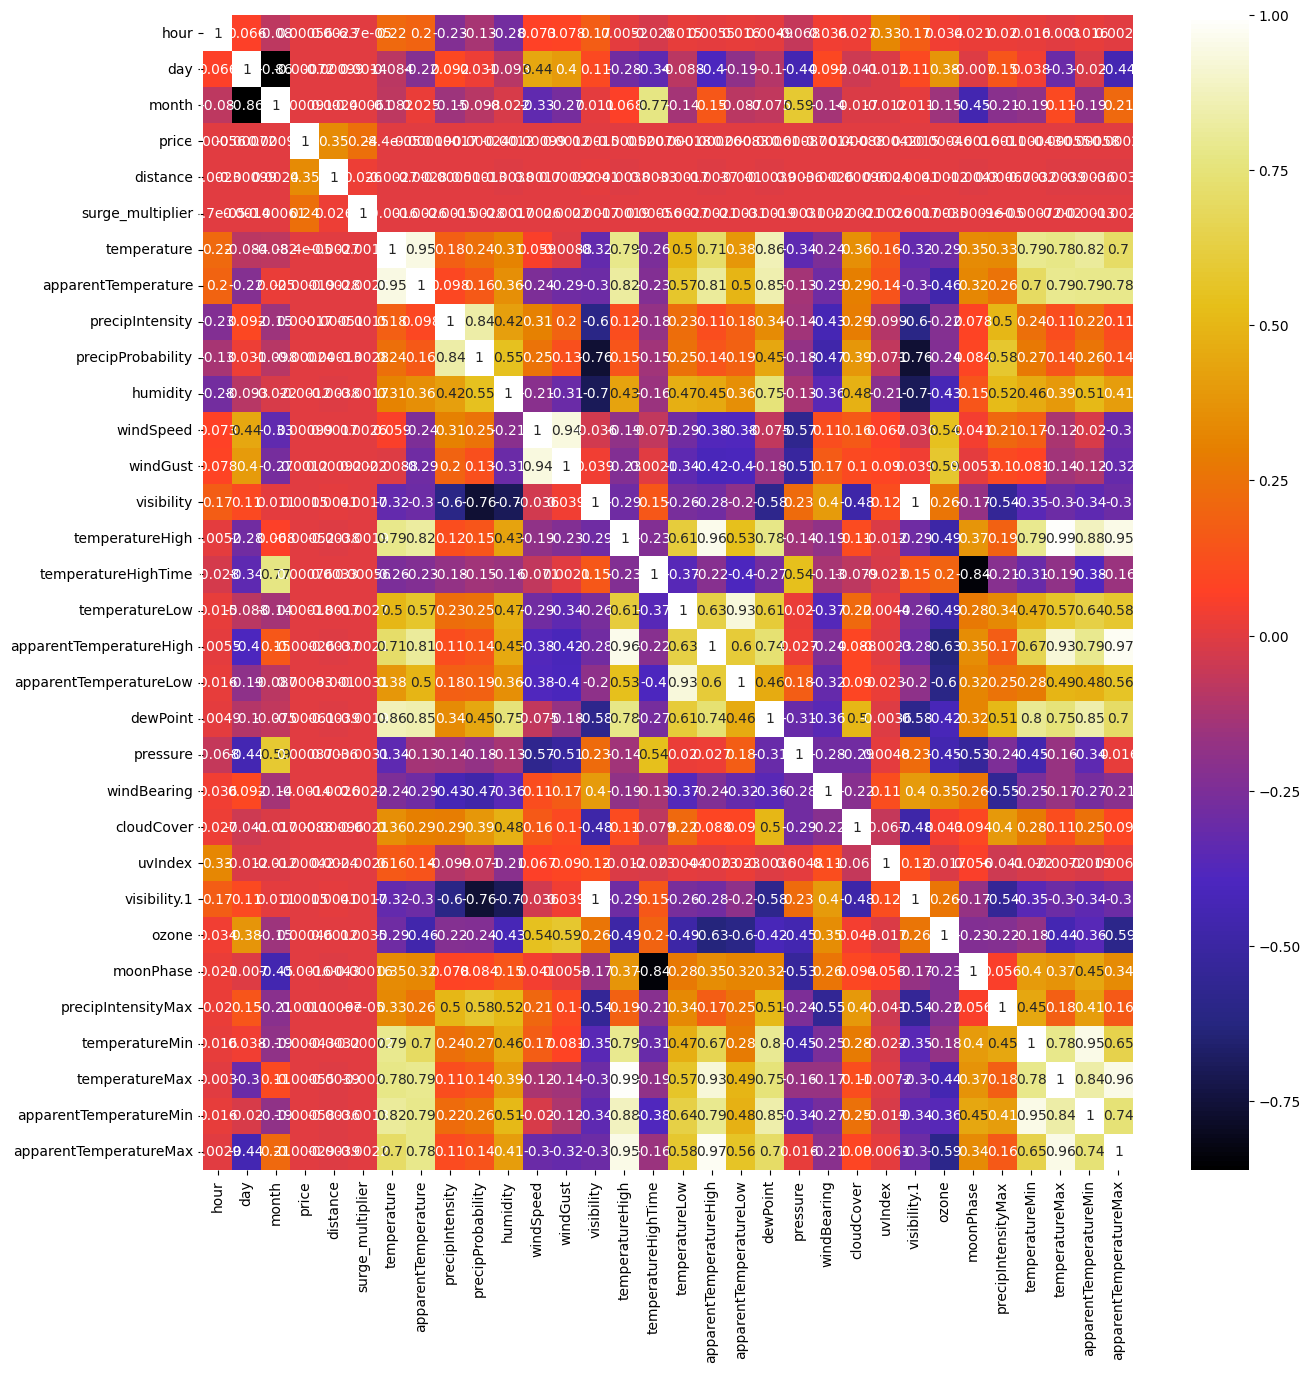

In [55]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

In [56]:
data_new = data[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
data_new.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


<AxesSubplot:>

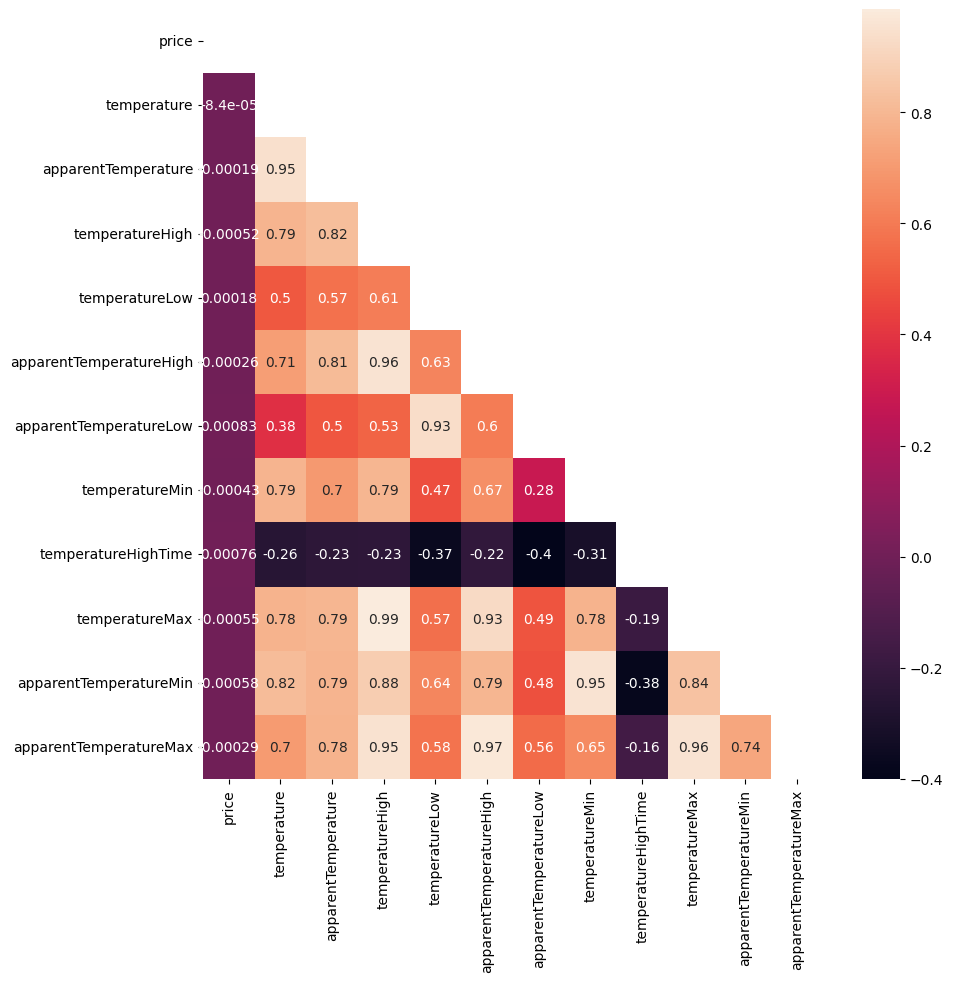

In [57]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(10,10))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

In [58]:
data_new = data[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
data = data.drop(data_new.columns,axis=1)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,rain,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


In [59]:
cli_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data_new = data[cli_col]
data_new.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
0,5.0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,10.000,303.8,0.30,0.1276
1,11.0,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,4.786,291.1,0.64,0.1300
2,7.0,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,10.000,315.7,0.68,0.1064
3,26.0,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,10.000,291.1,0.75,0.0000
4,9.0,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,10.000,347.7,0.72,0.0001


<AxesSubplot:>

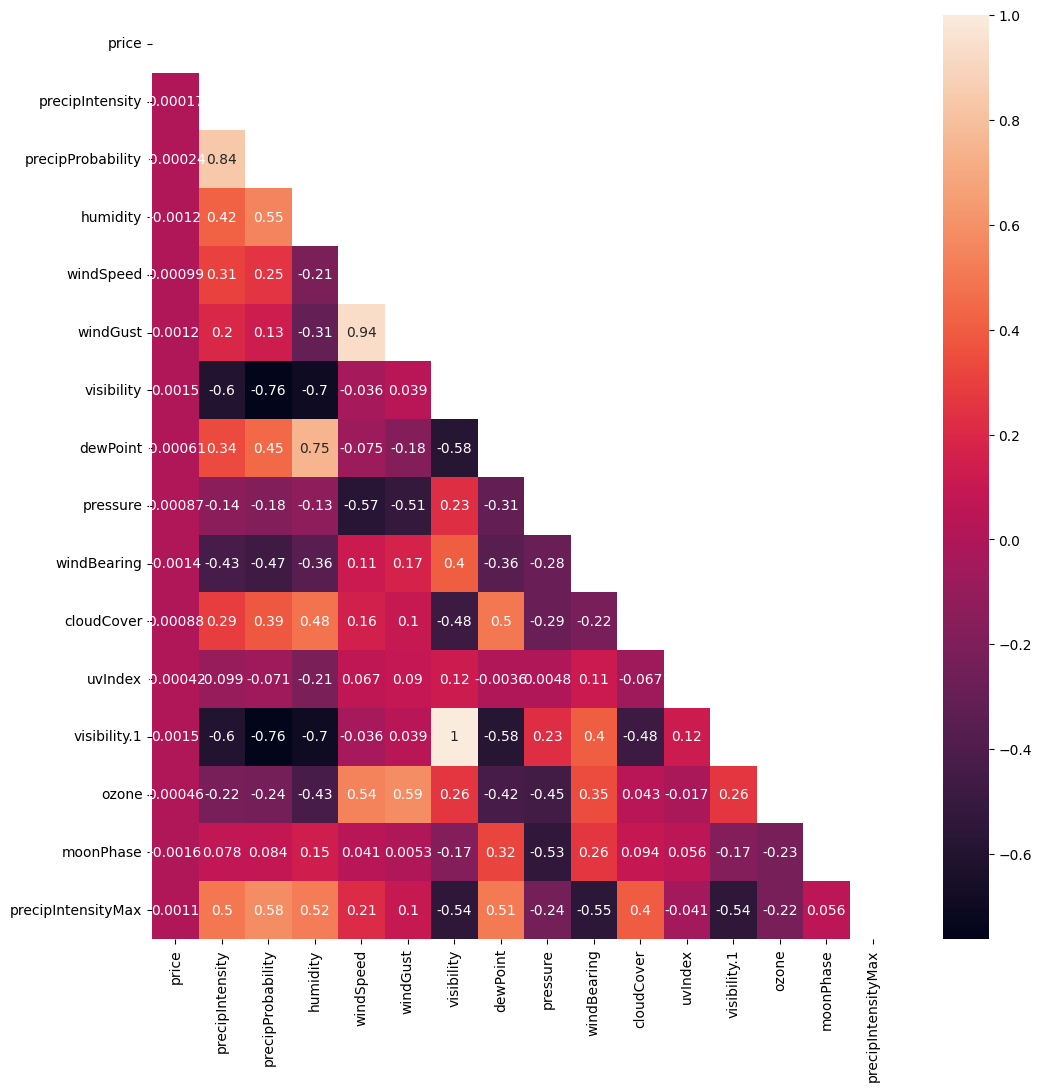

In [60]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

In [61]:
cli_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']
data = data.drop(cli_col,axis=1)
data.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [63]:
data.shape

(637976, 12)

In [66]:
from sklearn.preprocessing import OneHotEncoder
cat_col = data.select_dtypes(include=['object','category']).columns.tolist()
#intiate OneHotEncoder and concatinating original df with encoded column df's
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(data[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names_out([col])
    data = data.drop(col, axis=1)
    data = pd.concat([data, enc_df], axis=1)

In [67]:
data.columns

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'destination_nan', 'cab_type_Lyft',
       'cab_type_Uber', 'cab_type_nan', 'name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Sha

In [68]:
src_col = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
data_new = data[src_col]
data_new.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

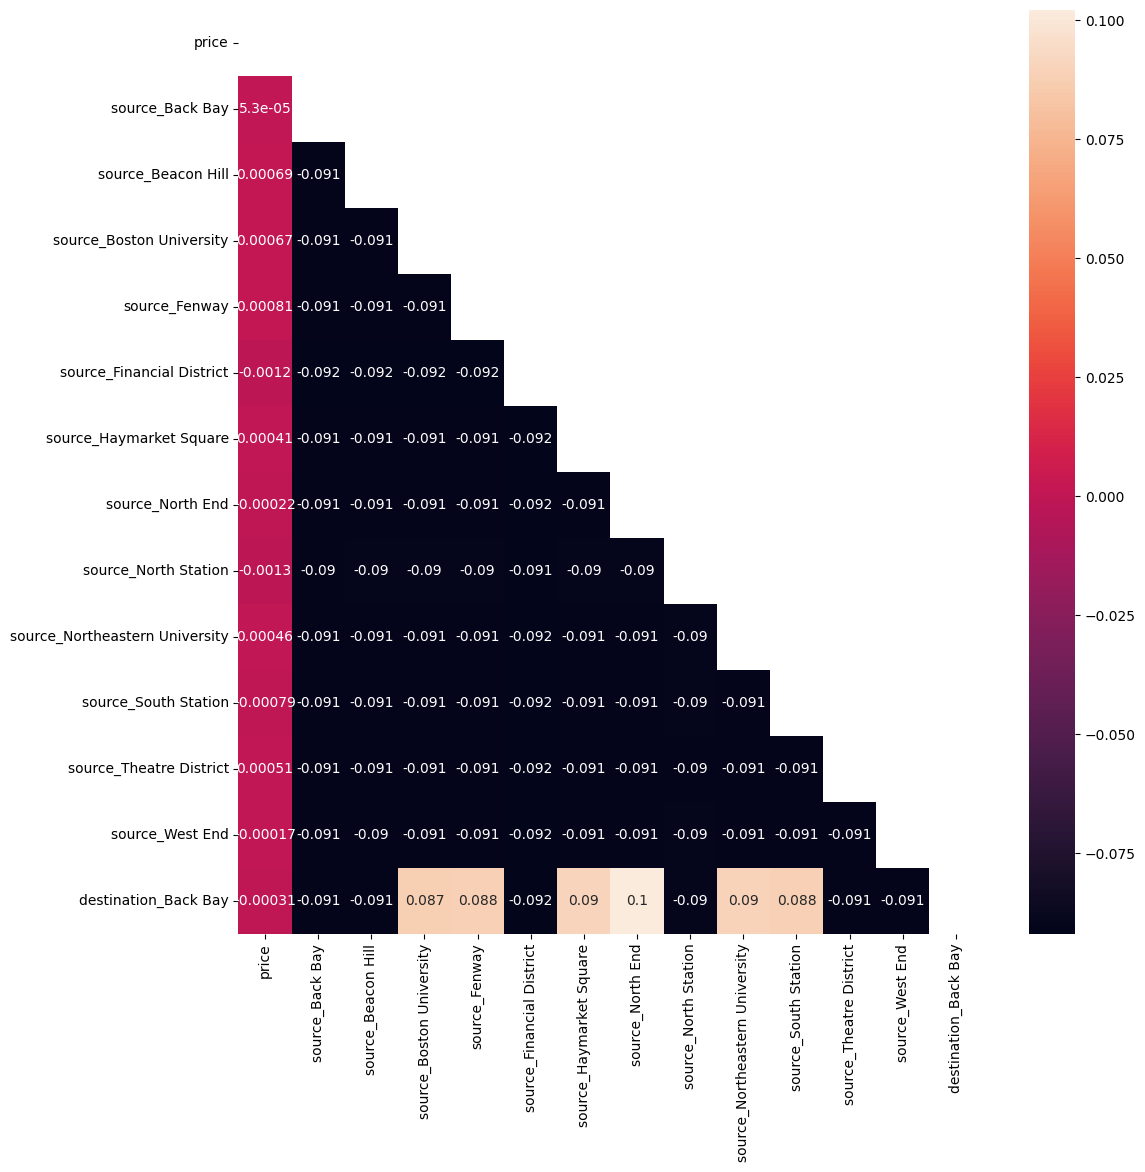

In [70]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

In [71]:
dst_col = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data_new = data[dst_col]
data_new.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

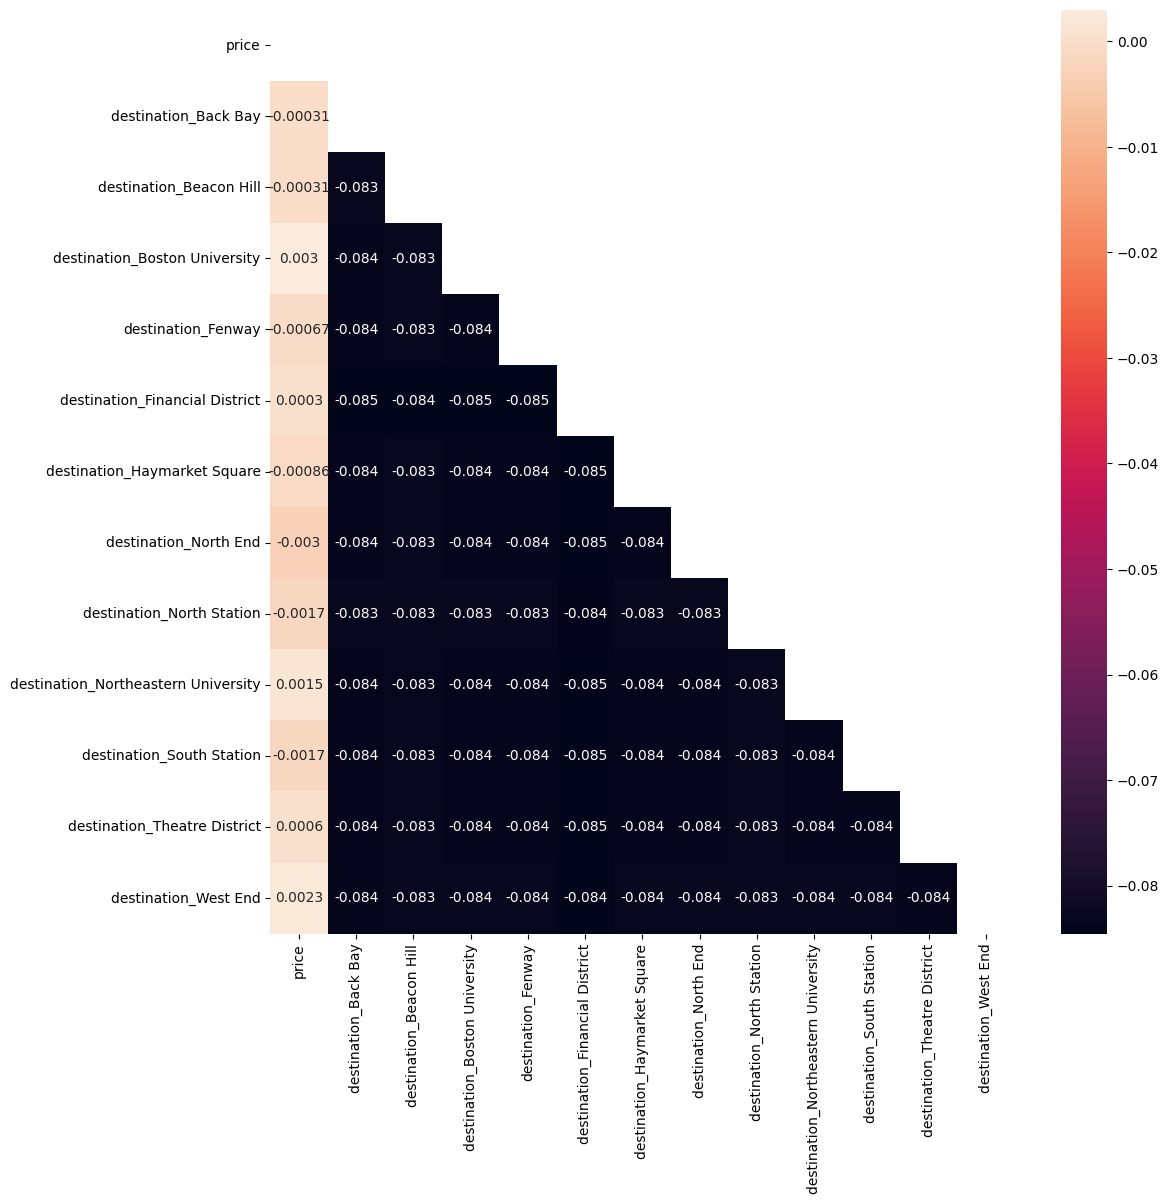

In [73]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

In [74]:
cols = ['source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End']
data = data.drop(cols,axis=1)
print(data.shape)
data.head()

(693071, 41)


,hour,day,month,price,distance,surge_multiplier,destination_nan,cab_type_Lyft,cab_type_Uber,cab_type_nan,...,short_summary_ Rain,short_summary_nan,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,icon_nan
0,9.0,16.0,12.0,5.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,27.0,11.0,11.0,0.44,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,28.0,11.0,7.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,30.0,11.0,26.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,29.0,11.0,9.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
summ_cols = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data_new = data[summ_cols]
data_new.head()

,price,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,short_summary_ Clear
0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

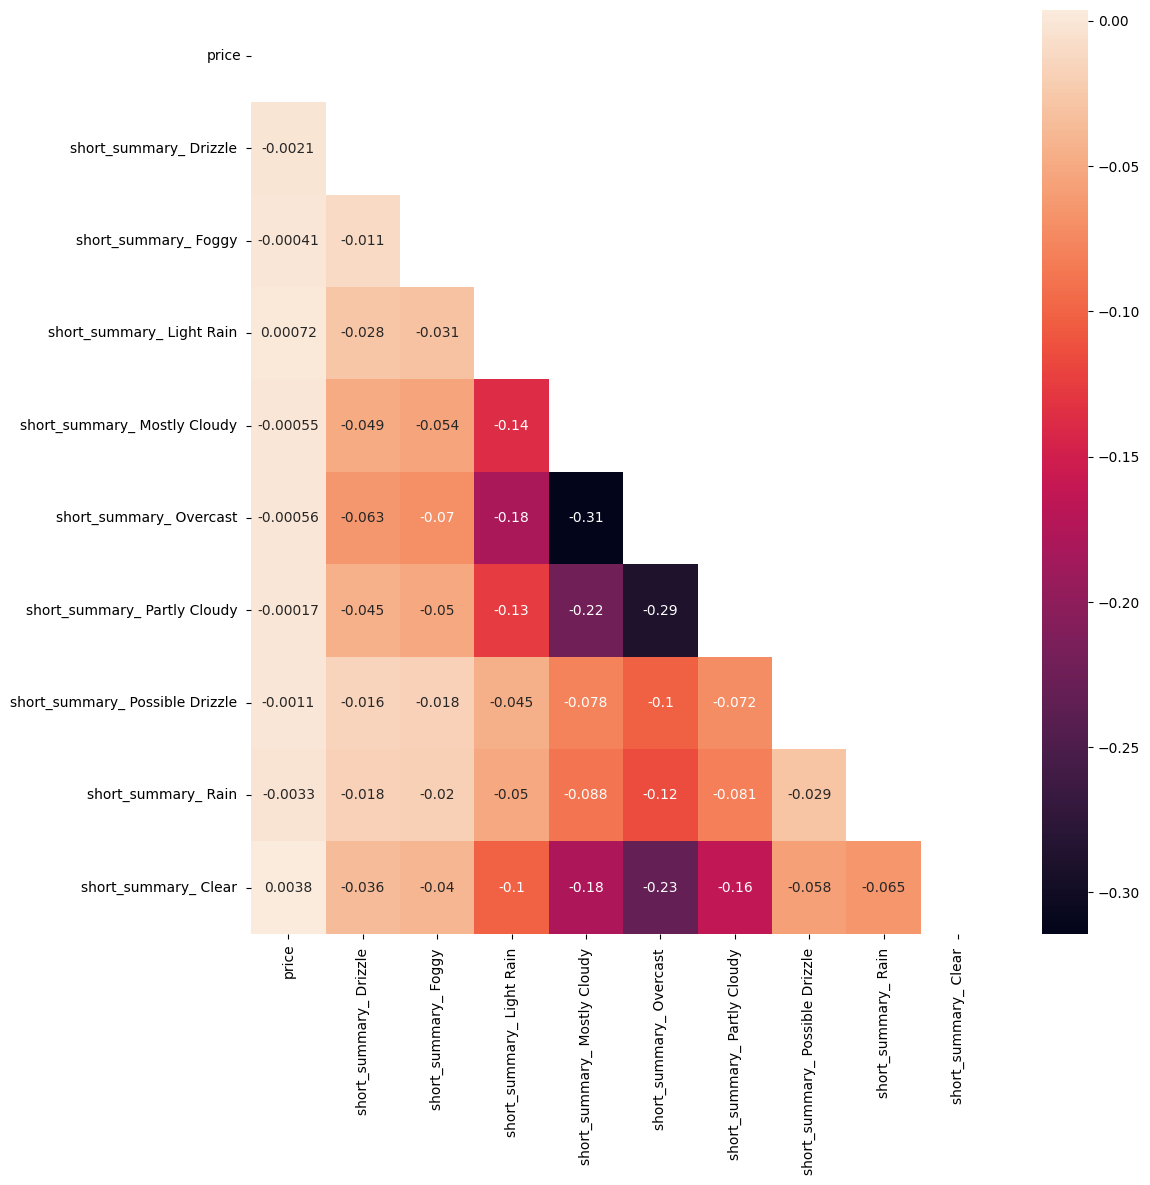

In [77]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

In [78]:
summ_cols = ['short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
data = data.drop(summ_cols,axis=1)
print(data.shape)
data.head()

(693071, 32)


,hour,day,month,price,distance,surge_multiplier,destination_nan,cab_type_Lyft,cab_type_Uber,cab_type_nan,...,name_nan,short_summary_nan,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain,icon_nan
0,9.0,16.0,12.0,5.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,27.0,11.0,11.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,28.0,11.0,7.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,30.0,11.0,26.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,29.0,11.0,9.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
ico_cols = ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data_new = data[ico_cols]
data_new.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

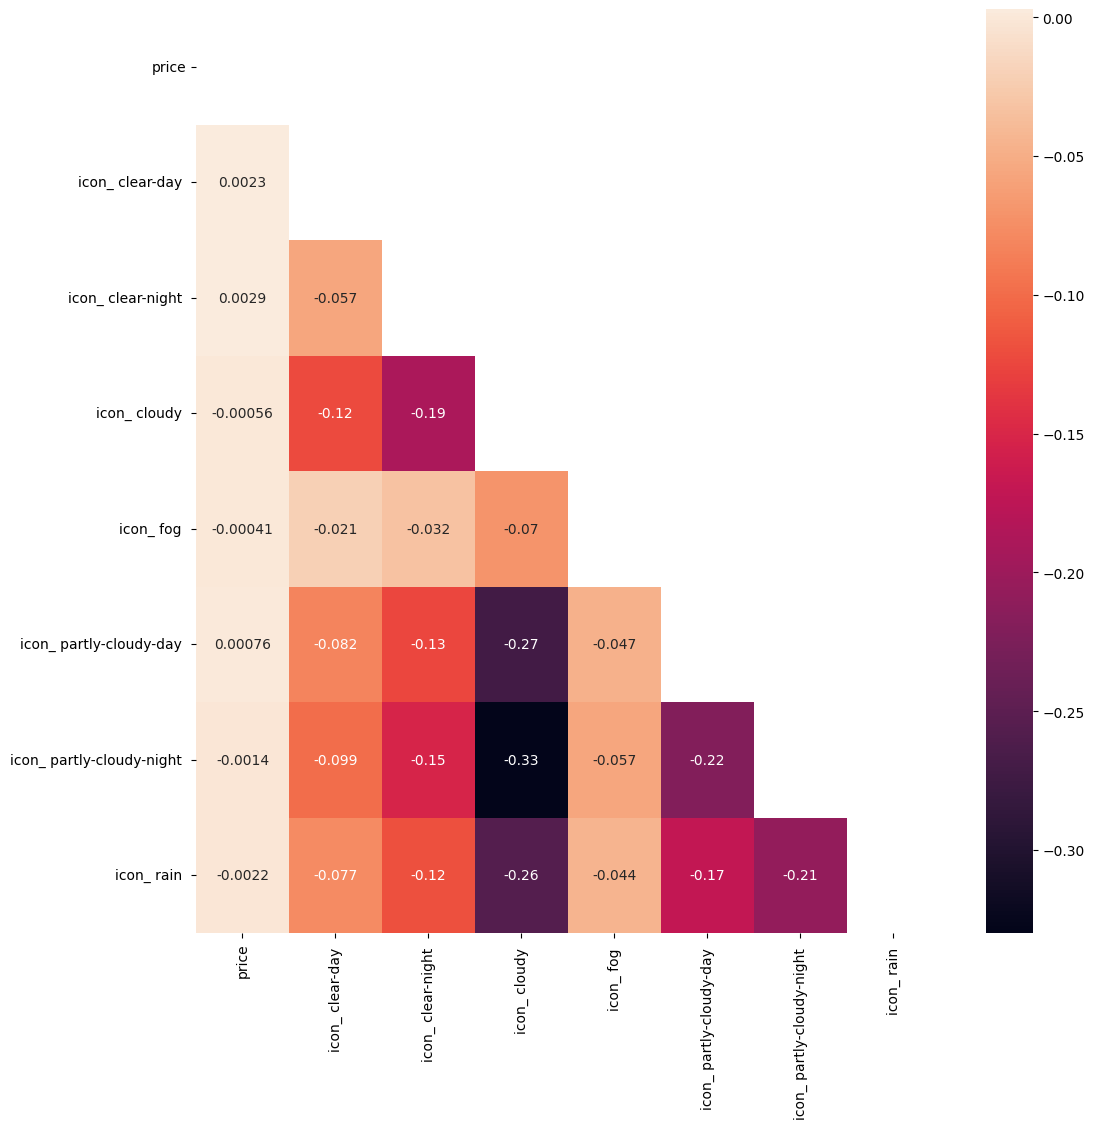

In [81]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

In [84]:
ico_cols = ['icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ',
       'icon_ rain ']
data = data.drop(ico_cols,axis=1)
print(data.shape)
data.head()

(693071, 25)


,hour,day,month,price,distance,surge_multiplier,destination_nan,cab_type_Lyft,cab_type_Uber,cab_type_nan,...,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,name_nan,short_summary_nan,icon_nan
0,9.0,16.0,12.0,5.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,27.0,11.0,11.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,28.0,11.0,7.0,0.44,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,30.0,11.0,26.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,29.0,11.0,9.0,0.44,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
nme_cols = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV']
data_new = data[nme_cols]
data_new.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

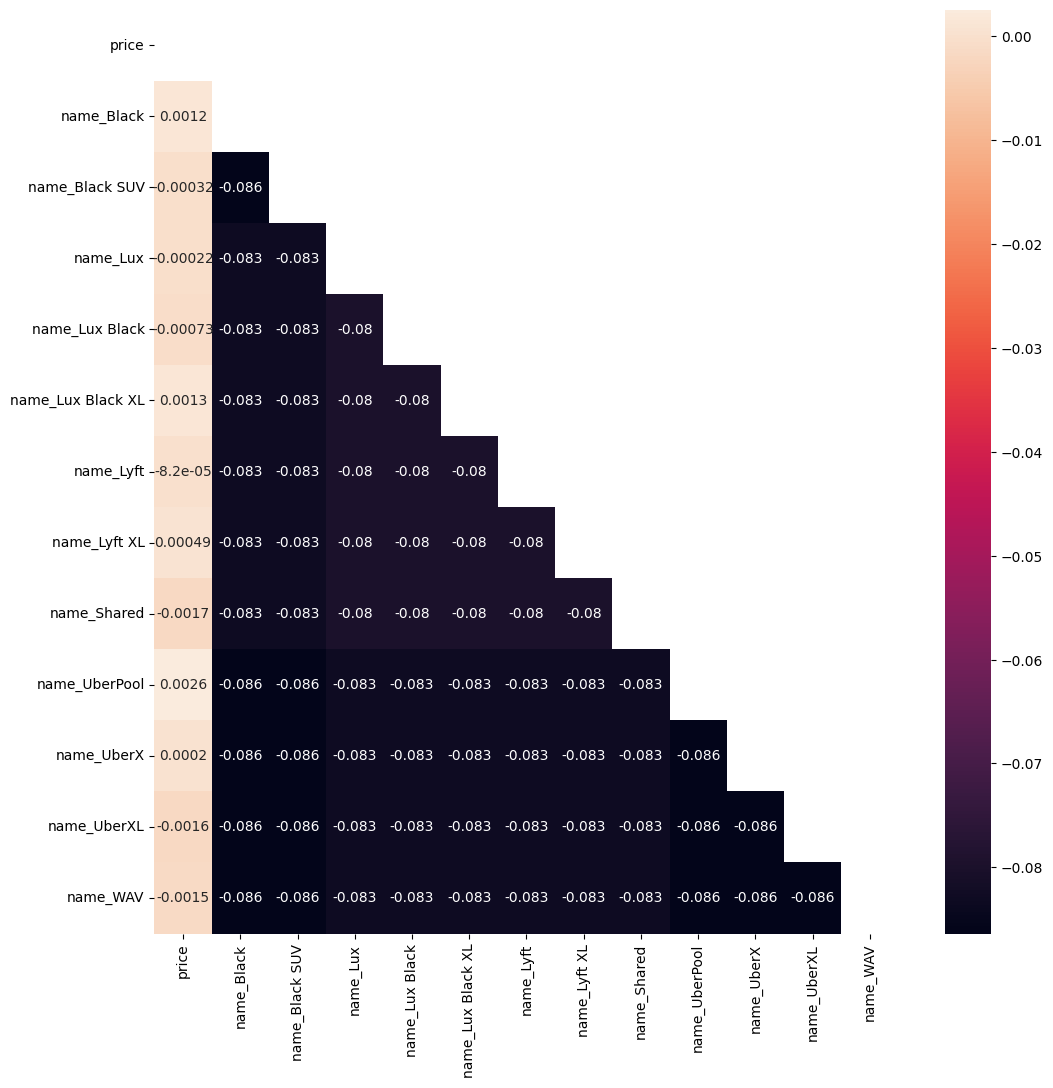

In [87]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

In [88]:
rem_cols =['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type_Lyft','cab_type_Uber']
data_new = data[rem_cols]
data_new.head()

,price,hour,day,month,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber
0,5.0,9.0,16.0,12.0,0.44,1.0,1.0,0.0
1,11.0,2.0,27.0,11.0,0.44,1.0,1.0,0.0
2,7.0,1.0,28.0,11.0,0.44,1.0,1.0,0.0
3,26.0,4.0,30.0,11.0,0.44,1.0,1.0,0.0
4,9.0,3.0,29.0,11.0,0.44,1.0,1.0,0.0


<AxesSubplot:>

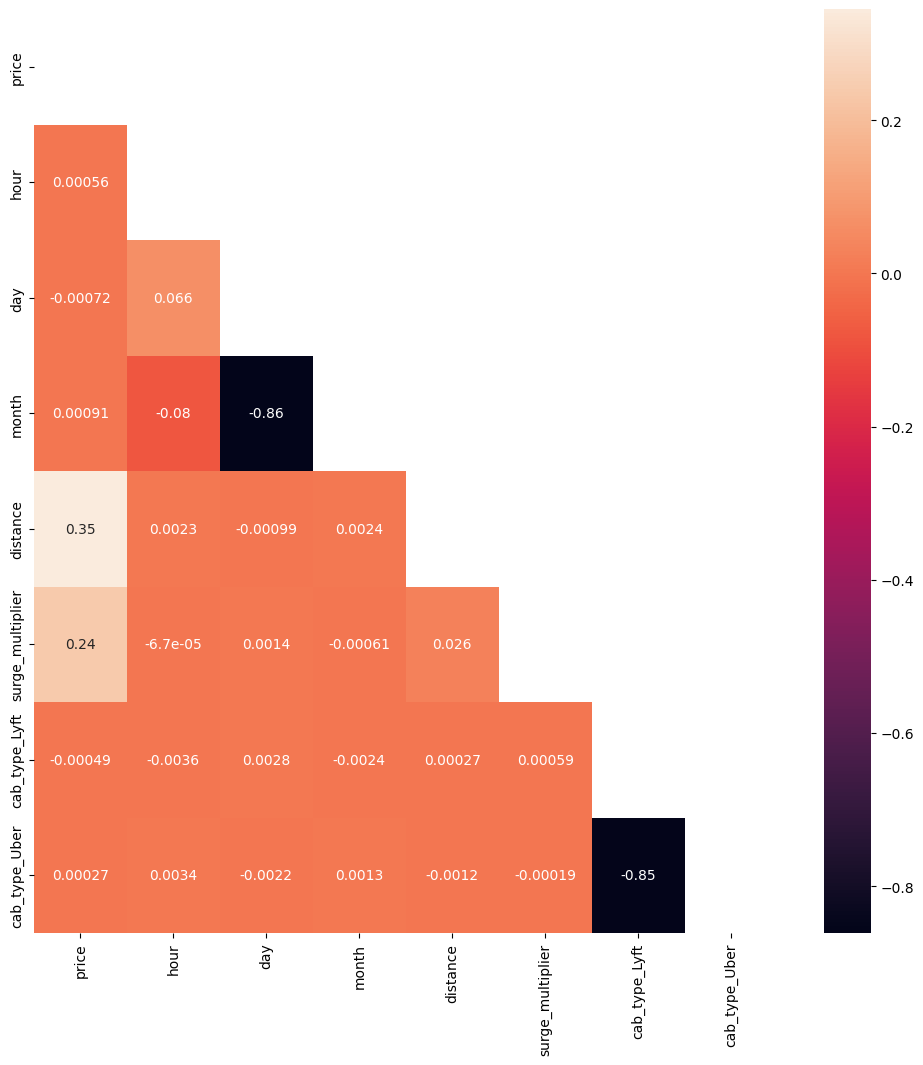

In [90]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(data_new.corr(),annot=True, mask=np.triu(data_new.corr()))

In [91]:
data = data.drop(['month','day','hour','cab_type_Lyft','cab_type_Uber'],axis=1)
print(data.shape)
data.head()

(693071, 20)


,price,distance,surge_multiplier,destination_nan,cab_type_nan,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,name_nan,short_summary_nan,icon_nan
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
data.isnull().sum()

price                55095
distance             55095
surge_multiplier     55095
destination_nan       4452
cab_type_nan           351
name_Black              32
name_Black SUV          32
name_Lux                32
name_Lux Black          32
name_Lux Black XL       32
name_Lyft               32
name_Lyft XL            32
name_Shared             32
name_UberPool           32
name_UberX              32
name_UberXL             32
name_WAV                32
name_nan                32
short_summary_nan        4
icon_nan                 1
dtype: int64

In [93]:
data = data.dropna(subset = ['price']).reset_index()

In [94]:
data.isnull().sum()

index                   0
price                   0
distance                0
surge_multiplier        0
destination_nan      4101
cab_type_nan          319
name_Black             28
name_Black SUV         28
name_Lux               28
name_Lux Black         28
name_Lux Black XL      28
name_Lyft              28
name_Lyft XL           28
name_Shared            28
name_UberPool          28
name_UberX             28
name_UberXL            28
name_WAV               28
name_nan               28
short_summary_nan       3
icon_nan                1
dtype: int64

In [95]:
max_threshold = data['price'].quantile(0.99)
max_threshold

42.5

In [96]:
data[data['price']>max_threshold]

,index,price,distance,surge_multiplier,destination_nan,cab_type_nan,name_Black,name_Black SUV,name_Lux,name_Lux Black,...,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,name_nan,short_summary_nan,icon_nan
645,706,52.5,3.25,2.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,707,67.5,3.25,2.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,769,45.5,4.76,1.00,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,1094,45.5,4.31,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1210,1318,45.5,5.33,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637394,692439,47.0,5.56,1.00,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
637637,692698,52.5,4.58,1.25,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
637813,692891,47.5,5.42,1.00,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
637878,692962,51.0,7.36,1.00,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [97]:
min_threshold = data['price'].quantile(0.01)
min_threshold

3.5

In [98]:
data[data['price']<min_threshold]

,index,price,distance,surge_multiplier,destination_nan,cab_type_nan,name_Black,name_Black SUV,name_Lux,name_Lux Black,...,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,name_nan,short_summary_nan,icon_nan
8,8,3.0,1.08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,53,3.0,0.71,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,174,3.0,1.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
312,336,3.0,1.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
361,390,3.0,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637611,692670,3.0,1.69,1.0,NaN,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
637660,692723,3.0,3.08,1.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
637705,692772,3.0,0.70,1.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
637779,692854,3.0,3.13,1.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

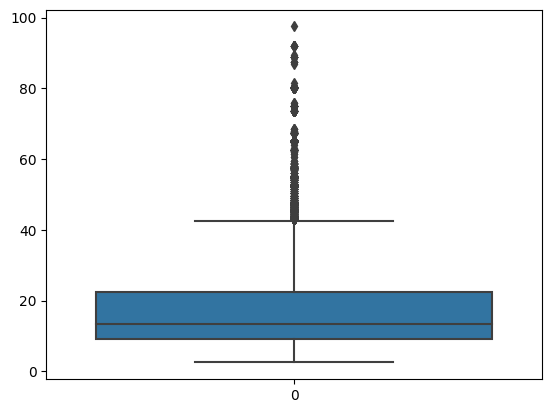

In [99]:
sns.boxplot(data['price'])

In [100]:
out = np.where(data['price']>43)
print(np.count_nonzero(np.where(data['price']>43)))

5357


In [101]:
data.drop(out[0], inplace = True)
data.shape

(632619, 21)

In [107]:
data = data.fillna(0)

In [108]:
from sklearn.model_selection import train_test_split
y = data['price'].values
X = data.drop(columns=['price'],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.12026274075134757

In [111]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

67.76805905271704
8.23213575281148


In [112]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)
y_pred = xgb_r.predict(X_test)

[19:09:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [113]:
r2_score(y_test, y_pred)

0.12528554978557527

In [114]:
mse = mean_squared_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print(mse)
print(rootmeansq)

67.3811412364445
8.208601661455166
